<a href="https://colab.research.google.com/github/Saibot19/7506R-1C2023-GRUPO21/blob/main/7506R_TP1_GRUPO21_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/FIUBA_gris_transparente.png" width="220" align="right" >

# <center> **Organización de Datos (75.06)**
        
## **Trabajo Práctico 1.**  
        
**Grupo 21:** 
* Cuevas; Juan Francisco. 
* Pata; Martín. 
* Serpa; Tobías.

---


# <center> **Importación de librerias y Dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_train.csv")

In [ ]:
df_trabajo = df.copy()
df_trabajo

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.50,0,1,Canceled,2016-08-25,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.00,1,0,Check-Out,2015-11-01,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,NaN,0,Transient,229.00,0,2,Check-Out,2016-10-14,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,NaN,0,Transient,75.00,0,0,Canceled,2016-11-29,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,NaN,0,Transient-Party,75.00,0,1,Check-Out,2017-03-26,28c75445-c603-413a-babf-ad377018b592,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,NaN,0,Transient,48.00,0,1,Canceled,2017-01-23,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,NaN,0,Transient,149.00,0,0,Check-Out,2016-09-03,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,153.0,0,Transient,95.00,0,0,Check-Out,2017-05-11,76fb0e83-59df-43ee-9c33-aec51030ed45,0
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,NaN,0,Transient,36.05,0,0,Canceled,2015-07-08,01906859-1094-4e37-b13e-b015b594d159,1


---


# Exploracion Inicial

analizar cada variable, considerando los siguientes aspectos
- Tipo de variable
- Variables Cuantitativas: calcular medidas de resumen: media, mediana,moda, etc
- Variables Cualitativas: reportar los posibles valores que toman y cuán
frecuentemente lo hacen.
- Determinar si existen variables irrelevantes para el análisis
- Realizar un análisis gráfico de las distribuciones de las variables
- Analizar las correlaciones existentes entre las variables.
- Analizar la relación de las variables con el target

## Descripcion de las variables

A continuacion tenemos la siguientes variables.

In [ ]:
df.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

| **Variable** | **Tipo** | **Descripción**|
|--------------|----------|----------------|
| **hotel**                     | Variable categorica  | Tipo de hotel |
| **lead_time**                 | Variable cuantitativa discreta | Días entre el momento en que se hizo la reserva y la fecha de llegada |
| **arrival_date_year**         | Variable cuantitativa discreta | Año de llegada |
| **arrival_date_month**        | Variable cuantitativa discreta | Mes de llegada |
| **arrival_date_week_number**  | Variable cuantitativa discreta | Número de semana del año de llegada |
| **arrival_date_day_of_month** | Variable cuantitativa discreta | Día del mes de llegada |
| **stays_in_weekend_nights**   | Variable cuantitativa discreta | Número de noches de fin de semana (sábado o domingo) que el huésped se queda en el hotel |
| **stays_in_week_nights**      | Variable cuantitativa discreta | Número de noches de entre semana que el huésped se queda en el hotel |
| **adults**                    | Variable cuantitativa discreta | Número de adultos en la reserva |
| **children**                  | Variable cuantitativa discreta | Número de niños en la reserva |
| **babies**                    | Variable cuantitativa discreta | Número de bebés en la reserva |
| **meal**                      | Variable categorica            | Tipo de comida en la reserva |
| **country**                   | Variable categorica            | País de origen del huésped |
| **market_segment**            | Variable categorica            | Segmento de mercado de la reserva |
| **distribution_channel**      | Variable categorica            | Canal de distribución de la reserva |
| **is_repeated_guest**         | Variable categorica            | Indica si el huésped ha reservado en el hotel anteriormente |
| **previous_cancellations**    | Variable cuantitativa discreta | Número de reservas canceladas anteriormente por el huésped |
| **previous_bookings_not_canceled**|Variable cuantitativa discreta| Número de reservas que el huésped ha realizado y no fueron canceladas |
| **reserved_room_type**        | Variable categorica            | Tipo de habitación reservada |
| **assigned_room_type**        | Variable categorica            | Tipo de habitación asignada |
| **booking_changes**           | Variable cuantitativa discreta | Número de cambios realizados en la reserva |
| **deposit_type**              | Variable categorica            | Tipo de depósito realizado por el huésped |
| **agent**                     | Variable categorica            | ID de la agencia de viajes a través de la cual se hizo la reserva |
| **company**                   | Variable categorica            | ID de la compañía que realizó la reserva o pagó por ella |
| **days_in_waiting_list**      | Variable cuantitativa discreta | Número de días que la reserva estuvo en lista de espera antes de ser confirmada |
| **customer_type**             | Variable categorica            | Tipo de cliente (transitorio, contratado, grupo o otros) |
| **adr**                       | Variable cuantitativa continua | Tarifa diaria promedio (Average Daily Rate) de la reserva |
| **required_car_parking_spaces**|Variable cuantitativa discreta | Número de plazas de aparcamiento solicitadas por el huésped |
| **total_of_special_requests** | Variable cuantitativa discreta | Número de solicitudes especiales realizadas por el huésped |
| **reservation_status**        | Variable categorica            | Estado final de la reserva (cancelada, check-out o no-show) |
| **reservation_status_date**   | Variable Ordinal               | Fecha en que se estableció el estado |
| **id**                        | Variable categorica            | Identificador único de la reserva |
| **is_canceled**               | Variable categorica            | Indica si la reserva fue cancelada (1) o no (0) |

Ya de por si podemos decir que la variable **id** es una variable irrelevante ya que seria unico para cada reserva
 

In [ ]:
df_trabajo.drop("id", axis="columns", inplace=True)
df_trabajo.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,54023.000000,3152.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.027991,0.114790,0.115420,0.195952,84.541010,188.539340,2.638977,102.383773,0.049957,0.523703,0.499750
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.164948,0.993723,1.396359,0.610519,109.523772,129.457025,18.619092,47.757640,0.221023,0.775412,0.500004
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.000000,0.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,179.000000,0.000000,95.000000,0.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,208.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,1.000000,26.000000,70.000000,17.000000,535.000000,543.000000,391.000000,510.000000,8.000000,5.000000,1.000000


In [ ]:
grf=df_trabajo['deposit_type'].value_counts().plot.bar(alpha=0.5, title="Frecuencia del estado de deposito por reserva",xlabel='Deposit type',ylabel='Frecuencia')  

NameError: ignored

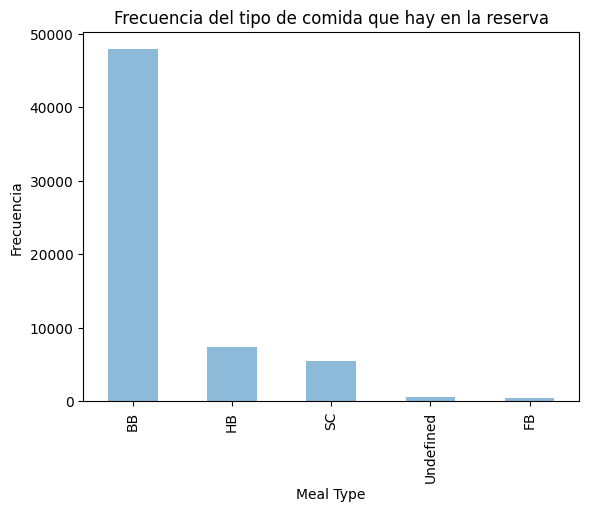

In [ ]:
grf=df_trabajo['meal'].value_counts().plot.bar(alpha=0.5, title="Frecuencia del tipo de comida que hay en la reserva",ylabel='Frecuencia',xlabel='Meal Type')  

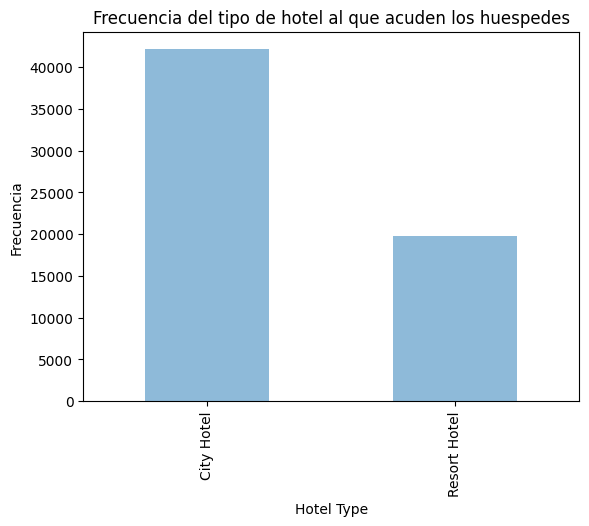

In [ ]:
grf=df_trabajo['hotel'].value_counts().plot.bar(alpha=0.5, title="Frecuencia del tipo de hotel al que acuden los huespedes",ylabel='Frecuencia',xlabel='Hotel Type')  

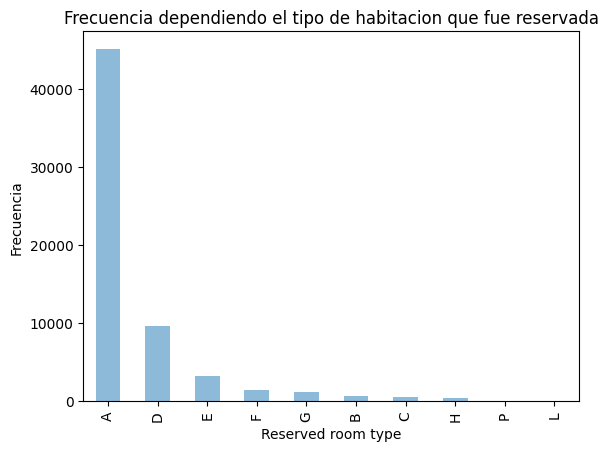

In [ ]:
grf=df_trabajo['reserved_room_type'].value_counts().plot.bar(alpha=0.5, title="Frecuencia dependiendo el tipo de habitacion que fue reservada",ylabel='Frecuencia',xlabel='Reserved room type')  

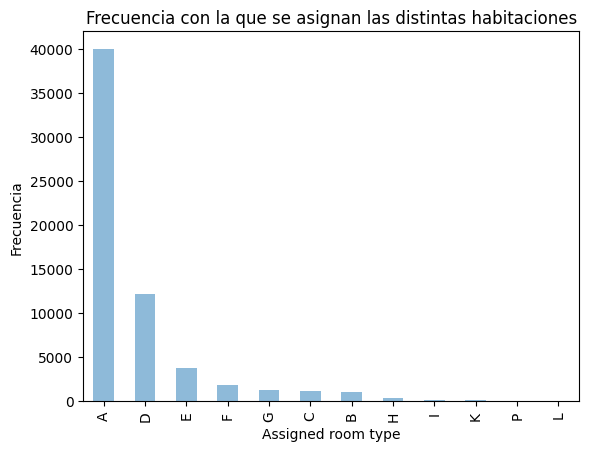

In [ ]:
grf=df_trabajo['assigned_room_type'].value_counts().plot.bar(alpha=0.5, title="Frecuencia con la que se asignan las distintas habitaciones",ylabel='Frecuencia',xlabel='Assigned room type')  

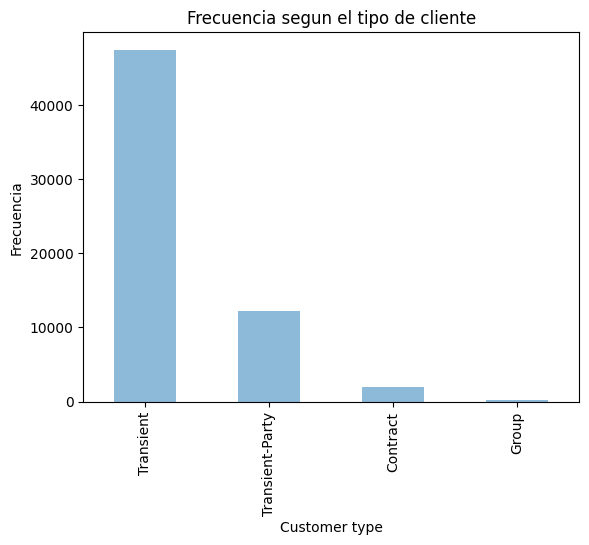

In [ ]:
grf=df_trabajo['customer_type'].value_counts().plot.bar(alpha=0.5, title="Frecuencia segun el tipo de cliente",ylabel='Frecuencia',xlabel='Customer type')  

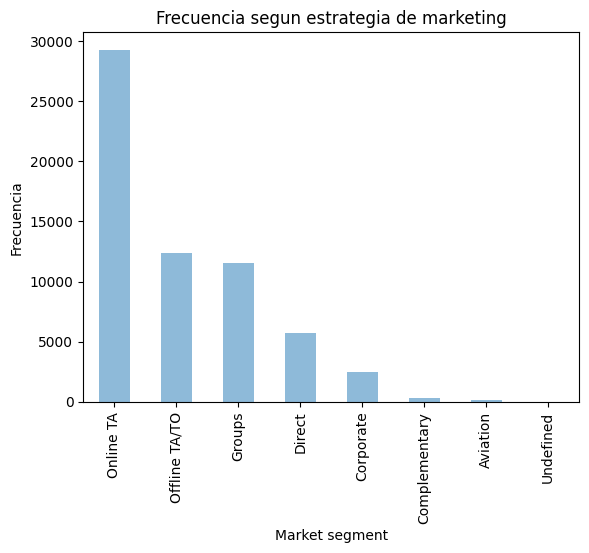

In [ ]:
grf=df_trabajo['market_segment'].value_counts().plot.bar(alpha=0.5, title="Frecuencia segun estrategia de marketing",ylabel='Frecuencia',xlabel='Market segment')  

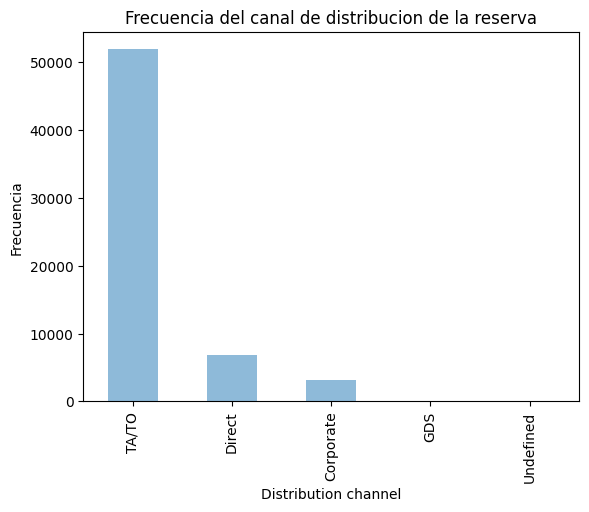

In [ ]:
grf=df_trabajo['distribution_channel'].value_counts().plot.bar(alpha=0.5, title="Frecuencia del canal de distribucion de la reserva",ylabel='Frecuencia',xlabel='Distribution channel')  

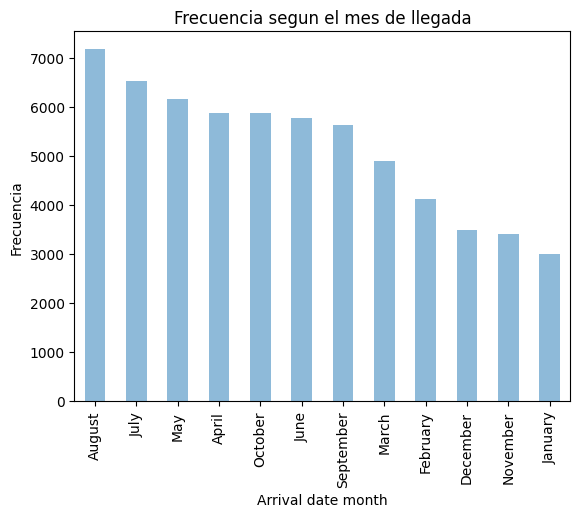

In [ ]:
grf=df_trabajo['arrival_date_month'].value_counts().plot.bar(alpha=0.5, title="Frecuencia segun el mes de llegada",ylabel='Frecuencia',xlabel='Arrival date month')  

In [ ]:
df_trabajo["country"].value_counts()

PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

(array([0.   , 0.002, 0.004, 0.006, 0.008]),
 [Text(1, 0.0, '0.000'),
  Text(1, 0.002, '0.002'),
  Text(1, 0.004, '0.004'),
  Text(1, 0.006, '0.006'),
  Text(1, 0.008, '0.008')])

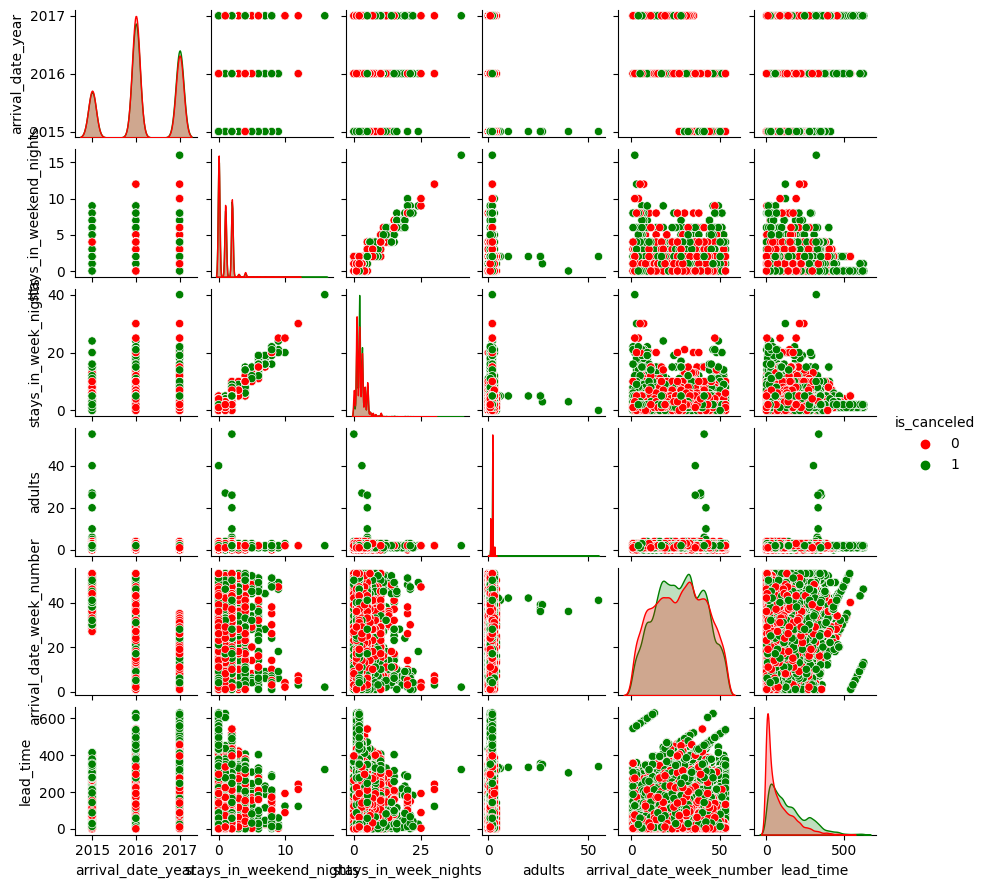

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"lead_time","arrival_date_year","arrival_date_week_number","stays_in_weekend_nights","stays_in_week_nights","adults"}, palette=["r","g"],height=1.5)
plt.xticks(rotation=90)
plt.yticks(rotation=90)

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"children","babies","is_repeated_guest","previous_cancellation","previous_bookings_not_canceled","booking_changes"}, palette=["r","g"])

In [ ]:
sns.pairplot(data=df_trabajo, hue="is_canceled", vars={"children","babies","is_repeated_guest","previous_cancellation","previous_bookings_not_canceled","booking_changes"}, palette=["r","g"])
plt.xticks(rotation=90)
plt.yticks(rotation=90)

<Axes: >

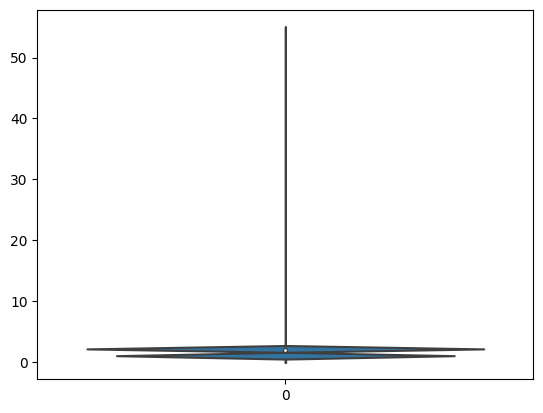

In [ ]:
sns.violinplot(data=df_trabajo["adults"])

<Axes: >

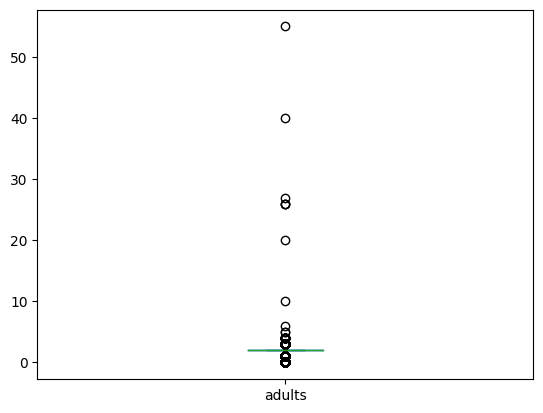

In [ ]:
df_trabajo["adults"].plot.box()

In [ ]:
df_trabajo.isna().sum() * 100 / len(df)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

In [ ]:
# Agente y Company son irrelevantes para la correlacion de pearson ya que son variables categoricas por ser ids y su numero no tiene relevancia mas que indicar que es unico y que esta presente
df_corr = df_trabajo.copy()
df_corr.drop(["agent","company"], axis="columns", inplace=True)
df_corr.corr(method="pearson")

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_canceled
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,-0.108033,0.094634,-0.068102,-0.019736,0.166423,-0.094559,-0.113772,-0.122760,0.293816
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.004587,-0.142232,0.027109,0.027285,-0.058523,0.217409,-0.011620,0.107899,0.019923
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,-0.022037,0.045530,-0.023897,0.012086,0.019328,0.075427,0.001424,0.029283,0.008357
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.005230,-0.034516,-0.002026,0.009522,0.027754,0.033695,0.000295,0.007744,-0.007371
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.080412,-0.011110,-0.037958,0.043753,-0.057509,0.061136,-0.014228,0.072150,0.001279
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.088363,-0.013417,-0.045190,0.070094,-0.004139,0.082910,-0.021657,0.073356,0.028439
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.129198,-0.003197,-0.096896,-0.045378,-0.009420,0.221538,0.010593,0.107599,0.060179
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.029847,-0.027296,-0.019686,0.058871,-0.035480,0.350482,0.045272,0.080017,0.006242
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.008925,-0.007734,-0.005790,0.088186,-0.010863,0.033735,0.036372,0.093348,-0.032034
is_repeated_guest,-0.108033,-0.004587,-0.022037,-0.005230,-0.080412,-0.088363,-0.129198,-0.029847,-0.008925,1.000000,0.075981,0.406030,0.008407,-0.021828,-0.132263,0.073732,0.015965,-0.090492


In [ ]:
# Replace NaN values in the "company" column with a string "No Company"
df_trabajo["company"].fillna("No Company", inplace=True)
# Create a pivot table that shows the counts of cancellations and non-cancellations for each value of the "company" column
pivot_table = pd.pivot_table(df_trabajo, index="company", columns="is_canceled", values="hotel", aggfunc="count", fill_value=0)

# Rename the columns to be more informative
pivot_table.columns = ["non_canceled", "canceled"]

# Add a column that shows the total number of bookings for each value of the "company" column
pivot_table["total"] = pivot_table["non_canceled"] + pivot_table["canceled"]
pivot_table["canceled_pct"] = (pivot_table["canceled"] / pivot_table["total"]) * 100

# Sort the table by the percentage of cancellations in ascending order
pivot_table = pivot_table.sort_values(by="canceled_pct",ascending=False)

pivot_table.head(30)

,non_canceled,canceled,total,canceled_pct
company,,,,
461.0,0,1,1,100.000000
37.0,0,6,6,100.000000
452.0,0,2,2,100.000000
85.0,0,1,1,100.000000
48.0,0,3,3,100.000000
202.0,0,26,26,100.000000
321.0,0,2,2,100.000000
316.0,0,2,2,100.000000
373.0,0,1,1,100.000000
